In [42]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')



In [43]:

#Import Data
data = 'C:\MCS\Clustering\mail.csv'
df = pd.read_csv(data)
# shape of data
df.shape
#Head of data
df.head()


,SAN,nbr,Sizekb
0,erpprod,10106.0,17.70
1,CBEMMS,1738.0,6.27
2,YonatanMedhane,468.0,138.01
3,BAYOUTILAHUN,277.0,143.71
4,BiniyamZewdu,270.0,191.88


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40313 entries, 0 to 40312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     40136 non-null  object 
 1   nbr     32735 non-null  float64
 2   Sizekb  32734 non-null  float64
dtypes: float64(2), object(1)
memory usage: 945.0+ KB


In [52]:
#Drop the rows where at least one element is missing.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32558 entries, 0 to 32699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     32558 non-null  object 
 1   nbr     32558 non-null  float64
 2   Sizekb  32558 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1017.4+ KB


In [53]:
df.isnull().sum()


SAN       0
nbr       0
Sizekb    0
dtype: int64

In [54]:
#Drop Columns
#df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
#Declare feature vector and target variable
X = df
#yorg = df['status_type']
# Convert categorical variable into integers
le = LabelEncoder()
#X['status_type'] = le.fit_transform(X['status_type'])
#yorg = le.transform(yorg)
#View the summary of X
X.info()
X.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32558 entries, 0 to 32699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     32558 non-null  object 
 1   nbr     32558 non-null  float64
 2   Sizekb  32558 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1017.4+ KB


,SAN,nbr,Sizekb
0,erpprod,10106.0,17.70
1,CBEMMS,1738.0,6.27
2,YonatanMedhane,468.0,138.01
3,BAYOUTILAHUN,277.0,143.71
4,BiniyamZewdu,270.0,191.88


In [55]:

#Feature Scaling
cols = X.columns
ORGdf=df.copy()
print( cols)
ORGdf.head()

Index(['SAN', 'nbr', 'Sizekb'], dtype='object')


,SAN,nbr,Sizekb
0,erpprod,10106.0,17.70
1,CBEMMS,1738.0,6.27
2,YonatanMedhane,468.0,138.01
3,BAYOUTILAHUN,277.0,143.71
4,BiniyamZewdu,270.0,191.88


In [56]:

y = pd.DataFrame(X, columns=['nbr', 'Sizekb'])
yid = pd.DataFrame(X, columns=['SAN'])
y.head()


,nbr,Sizekb
0,10106.0,17.70
1,1738.0,6.27
2,468.0,138.01
3,277.0,143.71
4,270.0,191.88


In [57]:
ms = MinMaxScaler()
y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=['nbr', 'Sizekb'])
y.head()


,nbr,Sizekb
0,1.000000,0.001341
1,0.171895,0.000475
2,0.046215,0.010454
3,0.027313,0.010885
4,0.026620,0.014534


In [33]:
yid.head()


,SAN
0,erpprod
1,CBEMMS
2,YonatanMedhane
3,BAYOUTILAHUN
4,BiniyamZewdu


In [38]:

#ms = MinMaxScaler()
#X = ms.fit_transform(X)
#X = pd.DataFrame(X, columns=[cols])
#X.head()
#X = pd.concat([yid, y], axis=1)
#X.head()

,SAN,nbr,Sizekb
0,erpprod,0.046670,0.001341
1,CBEMMS,0.008022,0.000475
2,YonatanMedhane,0.002157,0.010454
3,BAYOUTILAHUN,0.001275,0.010885
4,BiniyamZewdu,0.001242,0.014534


In [58]:
#K-Means model with two clusters
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(y)
#K-Means model parameters study
kmeans.cluster_centers_


array([[0.00047389, 0.0192156 ],
       [0.00085953, 0.10106969]])

In [59]:
#Inertia should be near  0
kmeans.inertia_
#The lesser the model inertia, the better the model fit.
#We can see that the model has very high inertia. So, this is not a good model fit to the data


30.231229379197863

In [62]:

#Check quality of weak classification by the model
labels = kmeans.labels_
print(labels)


[0 0 0 ... 0 1 0]


In [64]:

# check how many of the samples were correctly labeled
#correct_labels = sum(yorg == labels)
#print("Result: %d out of %d samples were correctly labeled." % (correct_labels, yorg.size))
#print('Accuracy score: {0:0.2f}'. format(correct_labels/float(yorg.size)))


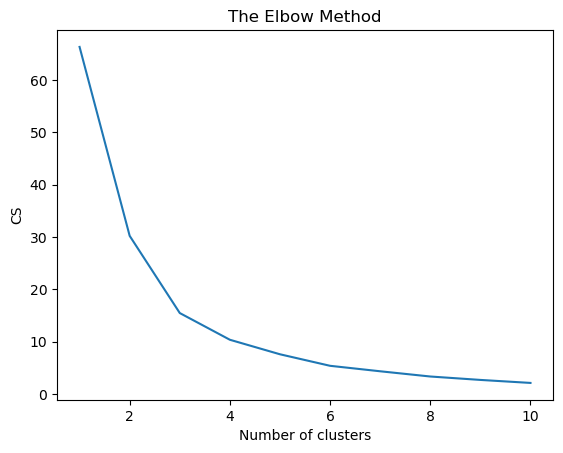

In [82]:

#Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
cs = []
ni=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(y)
    cs.append(kmeans.inertia_)
    # The number of iterations required to converge
    ni.append(kmeans.n_iter_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()




In [97]:
#Show Inertia for each K
np.set_printoptions(threshold=20)
#K=2
print("Inertia for K= 2 is" ,cs[1])
#K=4
print("Inertia for K= 4 is" ,cs[3])
#K=6
print("Inertia for K= 6 is" ,cs[5])
#K=8
print("Inertia for K= 8 is" ,cs[7])

Inertia for K= 2 is 30.231229379197874
Inertia for K= 4 is 10.37987622218081
Inertia for K= 6 is 5.403863866079367
Inertia for K= 68is 3.3595978593313003


In [84]:
#Show Number of iteration max is 300
np.set_printoptions(threshold=20)
print(ni)

[2, 11, 19, 24, 9, 10, 13, 8, 24, 4]


In [78]:
#K-Means model with Six clusters based on the plot above
kmeans = KMeans(n_clusters=6, random_state=0) 
kmeans.fit(y)
#K-Means model parameters study
kmeans.cluster_centers_

array([[9.08730426e-04, 3.50770884e-02],
       [8.17260806e-04, 1.28185931e-01],
       [9.84267740e-04, 6.92897292e-02],
       [4.79406070e-04, 2.26654386e-01],
       [1.90042963e-04, 7.77366840e-03],
       [2.72142504e-04, 4.91463397e-01]])

In [98]:
#labels generated
labels = kmeans.labels_
labels

array([7, 1, 1, ..., 1, 6, 1])

In [100]:
#labels generated
labels = kmeans.labels_
Profiles=pd.DataFrame(labels, columns=['Profile'])
Profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32558 entries, 0 to 32557
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Profile  32558 non-null  int32
dtypes: int32(1)
memory usage: 127.3 KB


In [ ]:
data = 'C:\MCS\Clustering\mail.csv'
df = pd.read_csv(data)
# shape of data
df.shape
#Head of data
df.head()
df.info()
df.isnull().sum()
#Drop Columns
#df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

#Declare feature vector and target variable
X = df
y = df['status_type']
# Convert categorical variable into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)
#View the summary of X
X.info()
X.head()

#Feature Scaling
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

#K-Means model with two clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)
#K-Means model parameters study
kmeans.cluster_centers_
#Inertia should be near  0
kmeans.inertia_
#The lesser the model inertia, the better the model fit.
#We can see that the model has very high inertia. So, this is not a good model fit to the data

#Check quality of weak classification by the model
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

#Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [ ]:
#Import Data
data = 'C:\MCS\Clustering\mail.csv'
df = pd.read_csv(data)
# shape of data
df.shape
#Head of data
df.head()
df.info()
df.isnull().sum()
#Drop Columns
#df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
#Declare feature vector and target variable
X = df
y = df['status_type']
# Convert categorical variable into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)
#View the summary of X
X.info()
X.head()

#Feature Scaling
cols = X.columns

ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

#K-Means model with two clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)
#K-Means model parameters study
kmeans.cluster_centers_
#Inertia should be near  0
kmeans.inertia_
#The lesser the model inertia, the better the model fit.
#We can see that the model has very high inertia. So, this is not a good model fit to the data

#Check quality of weak classification by the model
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

#Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
